In [100]:
import json
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
with open("benchmark.json") as json_file:
	data = json.load(json_file)['benchmarks']

data

[{'name': 'BM_Function_Sigmoid_mean',
  'family_index': 0,
  'per_family_instance_index': 0,
  'run_name': 'BM_Function_Sigmoid',
  'run_type': 'aggregate',
  'repetitions': 10,
  'threads': 1,
  'aggregate_name': 'mean',
  'aggregate_unit': 'time',
  'iterations': 10,
  'real_time': 3171.7174592064534,
  'cpu_time': 3170.78495123084,
  'time_unit': 'ns'},
 {'name': 'BM_Function_Sigmoid_median',
  'family_index': 0,
  'per_family_instance_index': 0,
  'run_name': 'BM_Function_Sigmoid',
  'run_type': 'aggregate',
  'repetitions': 10,
  'threads': 1,
  'aggregate_name': 'median',
  'aggregate_unit': 'time',
  'iterations': 10,
  'real_time': 3140.5552956357374,
  'cpu_time': 3138.4953146173407,
  'time_unit': 'ns'},
 {'name': 'BM_Function_Sigmoid_stddev',
  'family_index': 0,
  'per_family_instance_index': 0,
  'run_name': 'BM_Function_Sigmoid',
  'run_type': 'aggregate',
  'repetitions': 10,
  'threads': 1,
  'aggregate_name': 'stddev',
  'aggregate_unit': 'time',
  'iterations': 10,
  

In [102]:
results = {}

for row in data:
	# keys = row['run_name'].split('_')
	keys = re.split('_|/', row['run_name'])
	benchmark_type = keys[1]

	if benchmark_type not in results:
		results[benchmark_type] = {}

	type_results = results[benchmark_type]

	if keys[-1] not in type_results:
		type_results[keys[-1]] = {
			"runtime": {},
			"template": {}
		}

	impl = "template" if "Template" in keys else "runtime"
	benchmark = type_results[keys[-1]][impl]
	benchmark[row['aggregate_name']] = row['cpu_time']

# results

Text(0, 0.5, 'Decrease in CPU runtime (ns)')

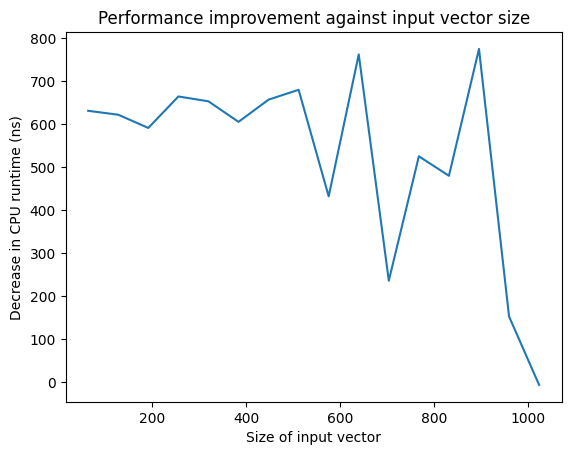

In [113]:
# Constant wrt input size
forwardprop_results = results['InputSize']
x = [int(n) for n in forwardprop_results.keys()]
runtime_y = [row['runtime']['mean'] for row in forwardprop_results.values()]
template_y = [row['template']['mean'] for row in forwardprop_results.values()]

y = [ runtime_y[i] - template_y[i] for i in range(len(runtime_y)) ]

fig, ax = plt.subplots()

# ax.plot(x, runtime_y, label="runtime")
# ax.plot(x, template_y, label="template")
# ax.legend()
ax.plot(x, np.array(runtime_y) - np.array(template_y))

ax.set_title("Performance improvement against input vector size")
ax.set_xlabel("Size of input vector")
ax.set_ylabel("Decrease in CPU runtime (ns)")
# ax.plot(x, y)
# ax.set_xscale('log')
# ax.set_yscale('log')v

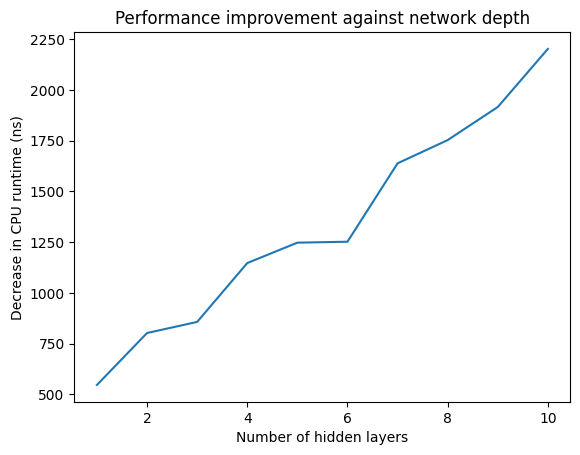

In [114]:
#Linear wrt depth
forwardprop_results = results['LayerDepth']
x = [int(n) for n in forwardprop_results.keys()]
runtime_y = [row['runtime']['mean'] for row in forwardprop_results.values()]
template_y = [row['template']['mean'] for row in forwardprop_results.values()]

y = [ runtime_y[i] - template_y[i] for i in range(len(runtime_y)) ]

fig, ax = plt.subplots()

# ax.plot(x, runtime_y, label="runtime")
# ax.plot(x, template_y, label="template")
# ax.legend()
ax.set_title("Performance improvement against network depth")
ax.set_xlabel("Number of hidden layers")
ax.set_ylabel("Decrease in CPU runtime (ns)")
ax.plot(x, np.array(runtime_y) - np.array(template_y))
# ax.plot(x, y)
# ax.set_xscale('log')
# ax.set_yscale('log')v

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Sigmoid'),
  Text(1, 0, 'Softmax'),
  Text(2, 0, 'Relu'),
  Text(3, 0, 'Linear'),
  Text(4, 0, 'MeanSquareError'),
  Text(5, 0, 'CategoricalCrossEntropy')])

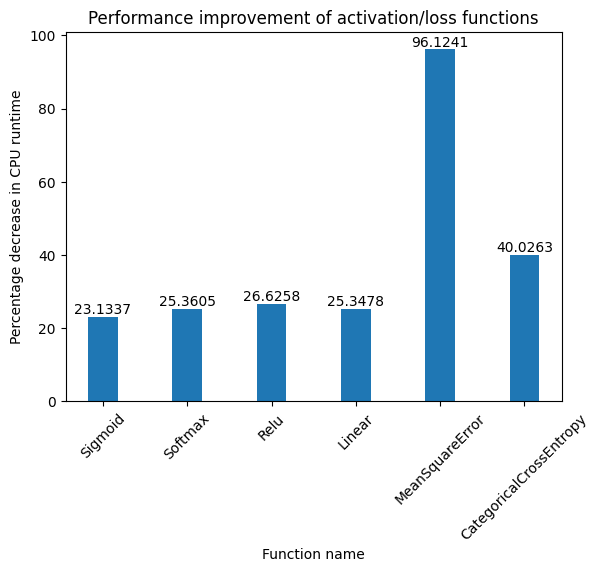

In [118]:
activation_results = results['Function']
labels = activation_results.keys()
x = np.arange(len(labels))
runtime_vals = [row['runtime']['mean'] for row in activation_results.values()]
template_vals = [row['template']['mean'] for row in activation_results.values()]
width = 0.35

fig, ax = plt.subplots()
# runtime_bars = ax.bar(x - width / 2, runtime_vals, width, label="runtime")
# template_bars = ax.bar(x + width / 2, template_vals, width, label="template")
bars = ax.bar(x,(1 - np.array(template_vals) / np.array(runtime_vals)) * 100, width)

ax.set_xticks(x, labels)
ax.bar_label(bars)
ax.set_title("Performance improvement of activation/loss functions")
ax.set_xlabel("Function name")
ax.set_ylabel("Percentage decrease in CPU runtime (%)")
plt.xticks(rotation=45)